<a href="https://colab.research.google.com/github/gaurav3210/MLnow_2.0/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




`Univariate Linear Regression Assignment`

[Link to Download the dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/code)

**Date Created**: June 10, 2021


**Author**:
 Gaurav Srivastava
 \

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [270]:
cd '/content/drive/MyDrive/ML.now()/assignment'

/content/drive/MyDrive/ML.now()/assignment


In [271]:
ls

 advertising.csv    'Real estate.csv'   train.csv
 Assignment1.ipynb   test.csv           univariateDataSet.csv


In [272]:
import pandas as pd #working with csv or excel files
import numpy as np #working with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library 
import os #using os commands between the python language


In [331]:
DataSet = pd.read_csv("train.csv")

In [332]:
DataSet.head(10)


DataSet.drop('Id',axis=1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,

In [333]:
DataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [334]:
print(f'''There are {len(DataSet.columns)} columns in the dataframe mathData namely,

{DataSet.columns}''')


There are 81 columns in the dataframe mathData namely,

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'Gar

In [335]:

print(f'street: {DataSet.Street.unique()}')
print(f'MSZoning: {DataSet.MSZoning.unique()}')
print(f'LotShape: {DataSet.LotShape.unique()}')
print(f'LandContour: {DataSet.LandContour.unique()}')
print(f'Alley: {DataSet.Alley.unique()}')
print(f'Condition1: {DataSet.Condition1.unique()}')
print(f'Condition2: {DataSet.Condition2.unique()}')
print(f'Utilities: {DataSet.Utilities.unique()}')
print(f'LotConfig: {DataSet.LotConfig.unique()}')

street: ['Pave' 'Grvl']
MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH']
LotShape: ['Reg' 'IR1' 'IR2' 'IR3']
LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']
Alley: [nan 'Grvl' 'Pave']
Condition1: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2: ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
Utilities: ['AllPub' 'NoSeWa']
LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']


In [336]:

#convert the categories into numbers 

#binary valued 

DataSet['Street'] = DataSet['Street'].apply({'Pave':0, 'Grvl':1}.get)

#multi-valued
DataSet['LandContour'] = DataSet['LandContour'].apply({'Lvl':1, 'Bnk':2,'Low':3, 'HLS':4}.get)


DataSet.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,0,NaN,Reg,1,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,0,NaN,Reg,1,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,0,NaN,IR1,1,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,0,NaN,IR1,1,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,0,NaN,IR1,1,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,0,NaN,IR1,1,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,...,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,0,NaN,Reg,1,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,...,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,0,NaN,IR1,1,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,...,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,0,NaN,Reg,1,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,...,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,0,NaN,Reg,1,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,...,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Ty

In [337]:

#consider the below columns from the DataFrame

DataSet = DataSet[['Street','LandContour','GrLivArea','PoolArea','SalePrice','MasVnrArea']]
DataSet.head(10)

,Street,LandContour,GrLivArea,PoolArea,SalePrice,MasVnrArea
0,0,1,1710,0,208500,196.0
1,0,1,1262,0,181500,0.0
2,0,1,1786,0,223500,162.0
3,0,1,1717,0,140000,0.0
4,0,1,2198,0,250000,350.0
5,0,1,1362,0,143000,0.0
6,0,1,1694,0,307000,186.0
7,0,1,2090,0,200000,240.0
8,0,1,1774,0,129900,0.0
9,0,1,1077,0,118000,0.0


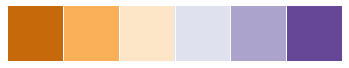

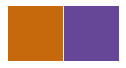

In [338]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purple to Orange colors
pal = sns.color_palette('PuOr', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [339]:

print(f'''There are {len(DataSet.columns)} columns in the dataframe mathData namely,

{DataSet.columns}''')

There are 6 columns in the dataframe mathData namely,

Index(['Street', 'LandContour', 'GrLivArea', 'PoolArea', 'SalePrice',
       'MasVnrArea'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


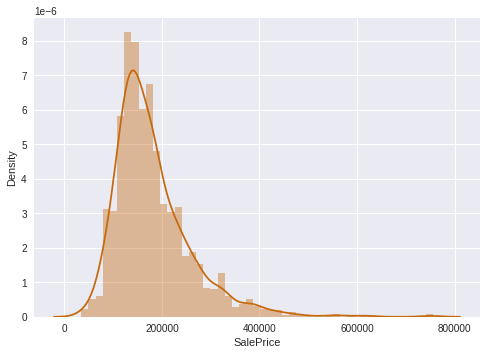

In [340]:
sns.distplot(DataSet['SalePrice'])

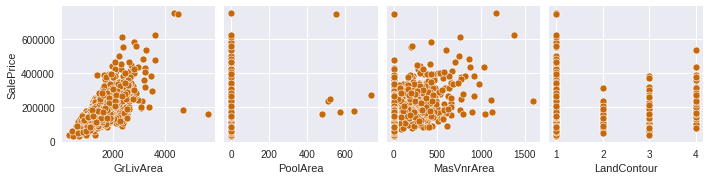

In [343]:
sns.pairplot(DataSet,
             x_vars = [ 'GrLivArea','PoolArea','MasVnrArea','LandContour'],
             y_vars = ['SalePrice'],
       diag_kind='kde'
             )

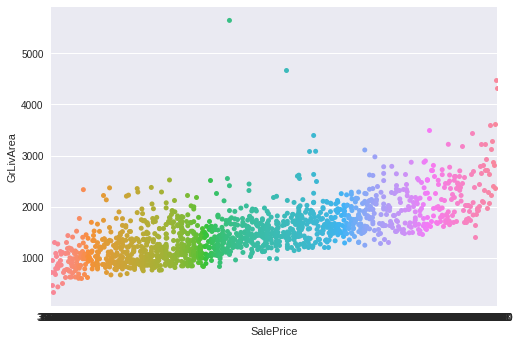

In [344]:
sns.stripplot(y='GrLivArea', x='SalePrice', data=DataSet)

In [345]:
DataSet = DataSet[DataSet.GrLivArea < 4000]  #Removing outliers for better result

In [346]:
DataSet['GrLivArea'] = np.log(DataSet['GrLivArea'])        #Changing range of GrLivArea and SalePrice
DataSet['SalePrice'] = np.log(DataSet['SalePrice'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


We are just going to consider the columns `SalePrice` and `GrLivArea` for univariate linear regression

$SalePrice_i = GrLivArea_i  \cdot \theta_1 + \theta_0$

In [347]:
x_variable = 'GrLivArea'
y_variable = 'SalePrice'
uniDataSet = DataSet[[x_variable,y_variable]]
uniDataSet.head(10)

,GrLivArea,SalePrice
0,7.444249,12.247694
1,7.140453,12.109011
2,7.487734,12.317167
3,7.448334,11.849398
4,7.695303,12.429216
5,7.216709,11.870600
6,7.434848,12.634603
7,7.644919,12.206073
8,7.480992,11.774520
9,6.981935,11.678440


In [348]:
uniDataSet.to_csv('univariateDataSet.csv')

In [349]:
ls

 advertising.csv    'Real estate.csv'   train.csv
 Assignment1.ipynb   test.csv           univariateDataSet.csv


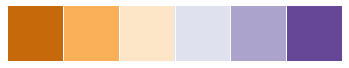

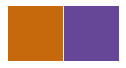

In [350]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purple to Orange colors
pal = sns.color_palette('PuOr', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

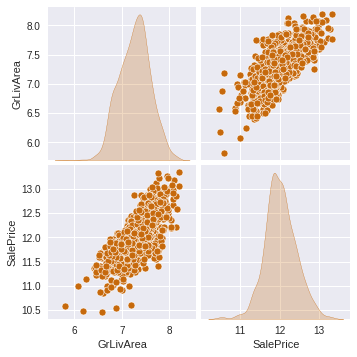

In [351]:
sns.pairplot(uniDataSet,x_vars=[x_variable,y_variable],y_vars=[x_variable,y_variable],diag_kind='kde')

In [352]:
#80-20 train-test percent split

trainDataset = uniDataSet.sample(frac=0.8, random_state=0) 
testDataset = uniDataSet.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())
print(trainDataset.shape,testDataset.shape)

     GrLivArea  SalePrice
511   7.221105  12.219310
963   7.495542  12.384219
231   7.935230  12.906692
688   7.257708  12.879017
34    7.353082  12.533576
    GrLivArea  SalePrice
11   7.751045  12.751300
23   6.966024  11.774520
24   6.966024  11.944708
25   7.377759  12.454104
28   7.377759  12.242887
(1165, 2) (291, 2)


In [353]:
#copy the trainDataset dataframe for getting the features

trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     GrLivArea  SalePrice
511   7.221105  12.219310
963   7.495542  12.384219
231   7.935230  12.906692
688   7.257708  12.879017
34    7.353082  12.533576
    GrLivArea  SalePrice
11   7.751045  12.751300
23   6.966024  11.774520
24   6.966024  11.944708
25   7.377759  12.454104
28   7.377759  12.242887


In [354]:
#removing the Sales column and saving it into the labels variable

trainLabels = trainFeatures.pop(y_variable)
testLabels = testFeatures.pop(y_variable)

print(trainLabels.head())
print(testLabels.head())
print(trainFeatures.head())
print(testFeatures.head())

511    12.219310
963    12.384219
231    12.906692
688    12.879017
34     12.533576
Name: SalePrice, dtype: float64
11    12.751300
23    11.774520
24    11.944708
25    12.454104
28    12.242887
Name: SalePrice, dtype: float64
     GrLivArea
511   7.221105
963   7.495542
231   7.935230
688   7.257708
34    7.353082
    GrLivArea
11   7.751045
23   6.966024
24   6.966024
25   7.377759
28   7.377759


In [355]:
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

In [356]:
model.compile(loss='mean_absolute_error',
              optimizer=tf.keras.optimizers.Adam(0.002),
              metrics=['mae','mse']
              )

In [357]:
numEpochs = 300
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Epoch 1/300
37/37 [==============================] - 0s 4ms/step - loss: 21.4685 - mae: 21.4685 - mse: 461.5147 - val_loss: 21.1400 - val_mae: 21.1400 - val_mse: 447.3966
Epoch 2/300
37/37 [==============================] - 0s 2ms/step - loss: 20.8567 - mae: 20.8567 - mse: 435.5946 - val_loss: 20.5277 - val_mae: 20.5277 - val_mse: 421.8543
Epoch 3/300
37/37 [==============================] - 0s 1ms/step - loss: 20.2451 - mae: 20.2451 - mse: 410.4232 - val_loss: 19.9152 - val_mae: 19.9152 - val_mse: 397.0547
Epoch 4/300
37/37 [==============================] - 0s 2ms/step - loss: 19.6335 - mae: 19.6335 - mse: 386.0077 - val_loss: 19.3033 - val_mae: 19.3033 - val_mse: 373.0259
Epoch 5/300
37/37 [==============================] - 0s 1ms/step - loss: 19.0220 - mae: 19.0220 - mse: 362.3365 - val_loss: 18.6913 - val_mae: 18.6913 - val_mse: 349.7470
Epoch 6/300
37/37 [==============================] - 0s 1ms/step - loss: 18.4106 - mae: 18.4106 - mse: 339.4286 - val_loss: 18.0794 - val_mae: 18

In [358]:
print(history)

In [359]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


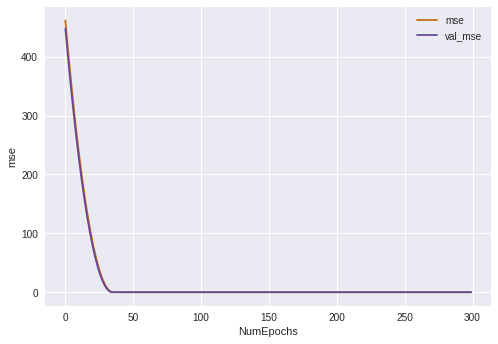

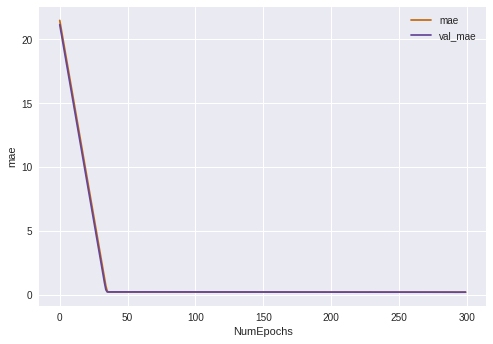

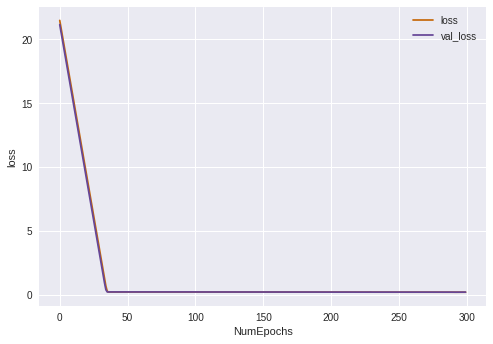

In [360]:
# tempString = 'mse'
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [361]:
testPreds = model.predict(testFeatures).flatten() #array of all prediction values

In [362]:
print(len(testPreds))
print(testPreds)

291
[12.6417465 11.742478  11.742478  12.214134  12.214134  11.91659
 12.283582  11.781781  12.000687  11.602409  12.29698   12.124052
 12.623362  12.295647  11.770237  12.1201725 12.185132  11.9072695
 11.917518  12.625363  12.340114  11.469162  11.908205  11.728342
 12.085457  12.107671  11.808615  11.883629  12.017811  11.734888
 12.556322  11.897872  12.325916  11.522764  12.014406  12.2903
 12.225533  12.3909235 12.29698   12.288288  12.250078  12.503613
 12.159138  12.209111  12.976214  12.292308  11.957621  11.48686
 11.78491   11.776548  12.381683  12.090254  12.613299  11.66074
 12.4466095 12.531085  12.302296  12.216994  12.236818  11.442795
 12.176286  11.508272  12.306266  11.500289  12.422393  12.2943125
 12.183662  12.44075   12.066069  12.243118  11.848708  12.925795
 11.876922  12.340114  12.415808  11.477364  11.947725  12.259063
 11.992897  12.709685  11.396968  11.810654  12.124052  11.760704
 12.783442  12.070947  11.66074   12.216994  12.415808  12.041361
 11.43857

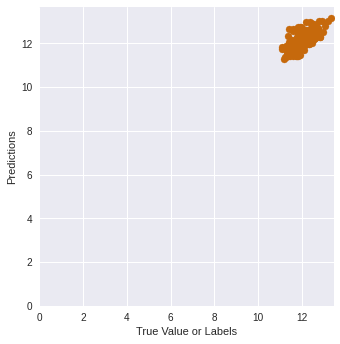

In [363]:
# prediciton plot --> how well is your model predicting across the actual labels

def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(testLabels, testPreds)

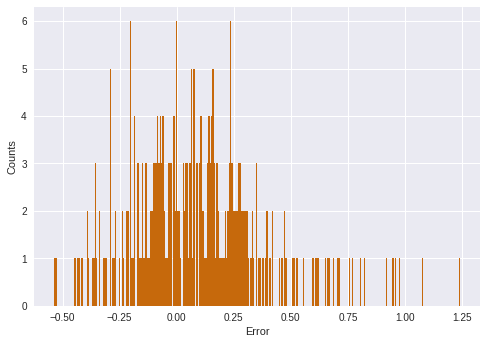

In [364]:
#error plot --> gaussian distribution 

def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)